# **Data Overview**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore") ##To ignore Python Future version related warnings. This help me focus only on the ERRORS

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AustoAuto1.csv')

In [ ]:
df.shape

(1581, 14)

**<font color="blue">df.shape() has revealed the dimensions of the given dataframe, indicating 1581 rows (entries) and 14 columns (features).<font>**

In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [ ]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


**<font color="blue">df.head() and df.tail() display the first and last few rows, respectively, providing a glimpse of the data's structure, column names, and the type of information stored<font>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


**<font color="blue"> The given dataframe comprises columns with a mix of data types, including 5 integers (int64), 1 floating-point numbers (float64), and 8 categorical/string data represented by object type.<font>**

**<font color="blue">Missing values have been identified in the "Partner_salary" and "Gender" columns of the given data. This issue requires further investigation and potential handling strategies, such as imputation or removal, to prevent it from negatively impacting the accuracy of analysis and model training.<font>**

In [ ]:
df.describe().T #checking the descriptive statistics of the given data


,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0




> **<font color="blue">df.describe().T is used to generate descriptive statistics of the numerical columns in the dataframe, providing insights into the distribution and central tendencies of the data.<font>**

In [ ]:
df.isnull().sum() #checking for null values

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum() #rechecking for null values

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


**Let us fix the missing values in Partner_salary column. Check the Skewness, Extreme values before deciding the method to consider (Mean or Mode)**

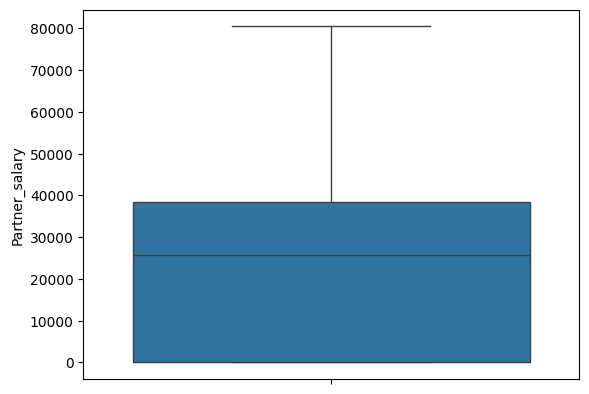

In [ ]:
sns.boxplot(df['Partner_salary']);

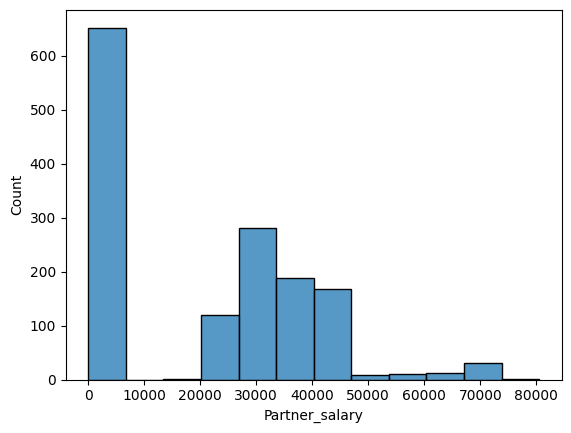

In [ ]:
sns.histplot(df['Partner_salary']);

The data is right skewed. Since the Partner_salary column has a slight positive skew, it is better to use the median to fill the missing values. The median is less affected by outliers and skewed data compared to the mean. But the partner salary exists only when the value Partner_working is 'Yes', if it is a 'NO', the partner salary should be 0.

In [ ]:
def fill_partner_salary(row):
  if row['Partner_working'] == 'Yes':
    return row['Partner_salary'] if not pd.isnull(row['Partner_salary']) else df['Partner_salary'].median()
  else:
    return 0

df['Partner_salary'] = df.apply(lambda row: fill_partner_salary(row), axis=1)

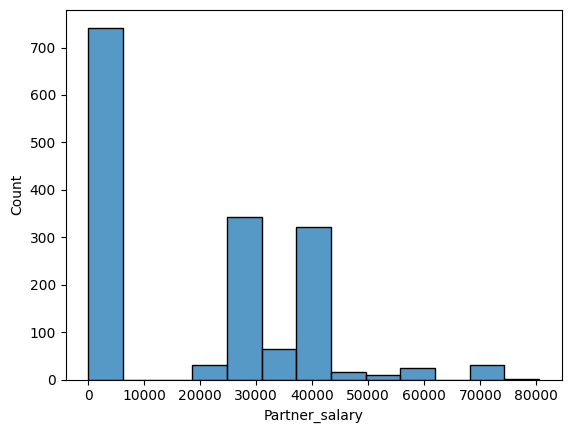

In [ ]:
sns.histplot(df['Partner_salary']); #rechecking that there is no drastic change in the chart

In [ ]:
df.describe().T #Rechecking the statistical summary for any impact on the values

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19128.589500,19488.355948,0.0,0.0,25100.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [ ]:
df.info() #Data is cleaned up, no missing values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [ ]:
df.duplicated().sum() #checking for duplicate entries

0

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
  print(f"Unique values in {column}: {df[column].unique()}") #Checking for inconsistent values like spelling errors in the categorical columns

Unique values in Gender: ['Male' 'Femal' 'Female' 'Femle']
Unique values in Profession: ['Business' 'Salaried']
Unique values in Marital_status: ['Married' 'Single']
Unique values in Education: ['Post Graduate' 'Graduate']
Unique values in Personal_loan: ['No' 'Yes']
Unique values in House_loan: ['No' 'Yes']
Unique values in Partner_working: ['Yes' 'No']
Unique values in Make: ['SUV' 'Sedan' 'Hatchback']


Values are inconsistent in the **Gender** column.

In [ ]:
df['Gender'].replace(['Femal', 'Femle'], 'Female', inplace=True)

In [ ]:
print(df['Gender'].unique()) #rechecking Gender column

['Male' 'Female']


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
  print(f"Unique values in {column}: {df[column].unique()}") #rechecking the categorical columns for inconsistent values

Unique values in Gender: ['Male' 'Female']
Unique values in Profession: ['Business' 'Salaried']
Unique values in Marital_status: ['Married' 'Single']
Unique values in Education: ['Post Graduate' 'Graduate']
Unique values in Personal_loan: ['No' 'Yes']
Unique values in House_loan: ['No' 'Yes']
Unique values in Partner_working: ['Yes' 'No']
Unique values in Make: ['SUV' 'Sedan' 'Hatchback']


***Data cleaning is completed. We checked for missing values, duplicate values, inconsistencies in the data. Addressed all of them using appropriate methods.***


1. The dataset has 1581 rows and 14 columns.
2. There were missing values in the 'Partner_salary' and 'Gender' columns.
3. There were inconsistencies in the 'Gender' column (e.g., "Femal","Femle" instead of "Female").
4. Missing values were handled:
'Gender': Filled with the mode.
'Partner_salary': Filled with the median.
5. Checked for duplicate values. There are none.
6. Partner Salary: Features like 'Partner_salary', 'Household_income', and 'Partner_working_hours' exhibit variations in their distributions, as indicated by their standard deviations and ranges.
7. Age and Related Features: Features related to age ('Age', 'Partner_age', 'Years_working') also show variations in their distributions.
8. Potential Outliers: The difference between the 75th percentile and maximum values for some features, such as 'Partner_salary', 'Household_income', and 'Money_saved', suggests the possibility of outliers or skewed distributions.
9. Data Understanding: The descriptive statistics in the df.describe().T output offer a valuable initial understanding of the numerical features' characteristics, informing potential further analyses or preprocessing steps.


# UNIVARIATE ANALYSIS

The Management of the Austo Autos would like to know some insights in to their customers data. Like Distribution Levels of Gender, Education, Professiom Marital Status, Loan Status, etc.

**Categorical Columns**
Gender, Profession, Marital_status, Education, Personal_loan, House_loan,Partner_working, Make

**Numerical Columns**
Age,
No_of_Dependents,
Salary

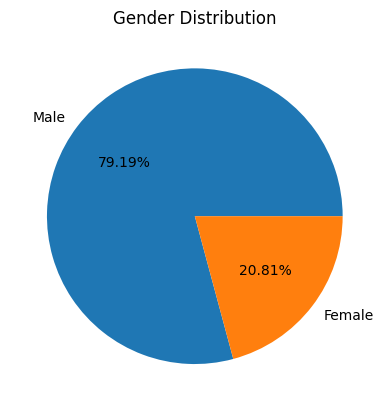

In [ ]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

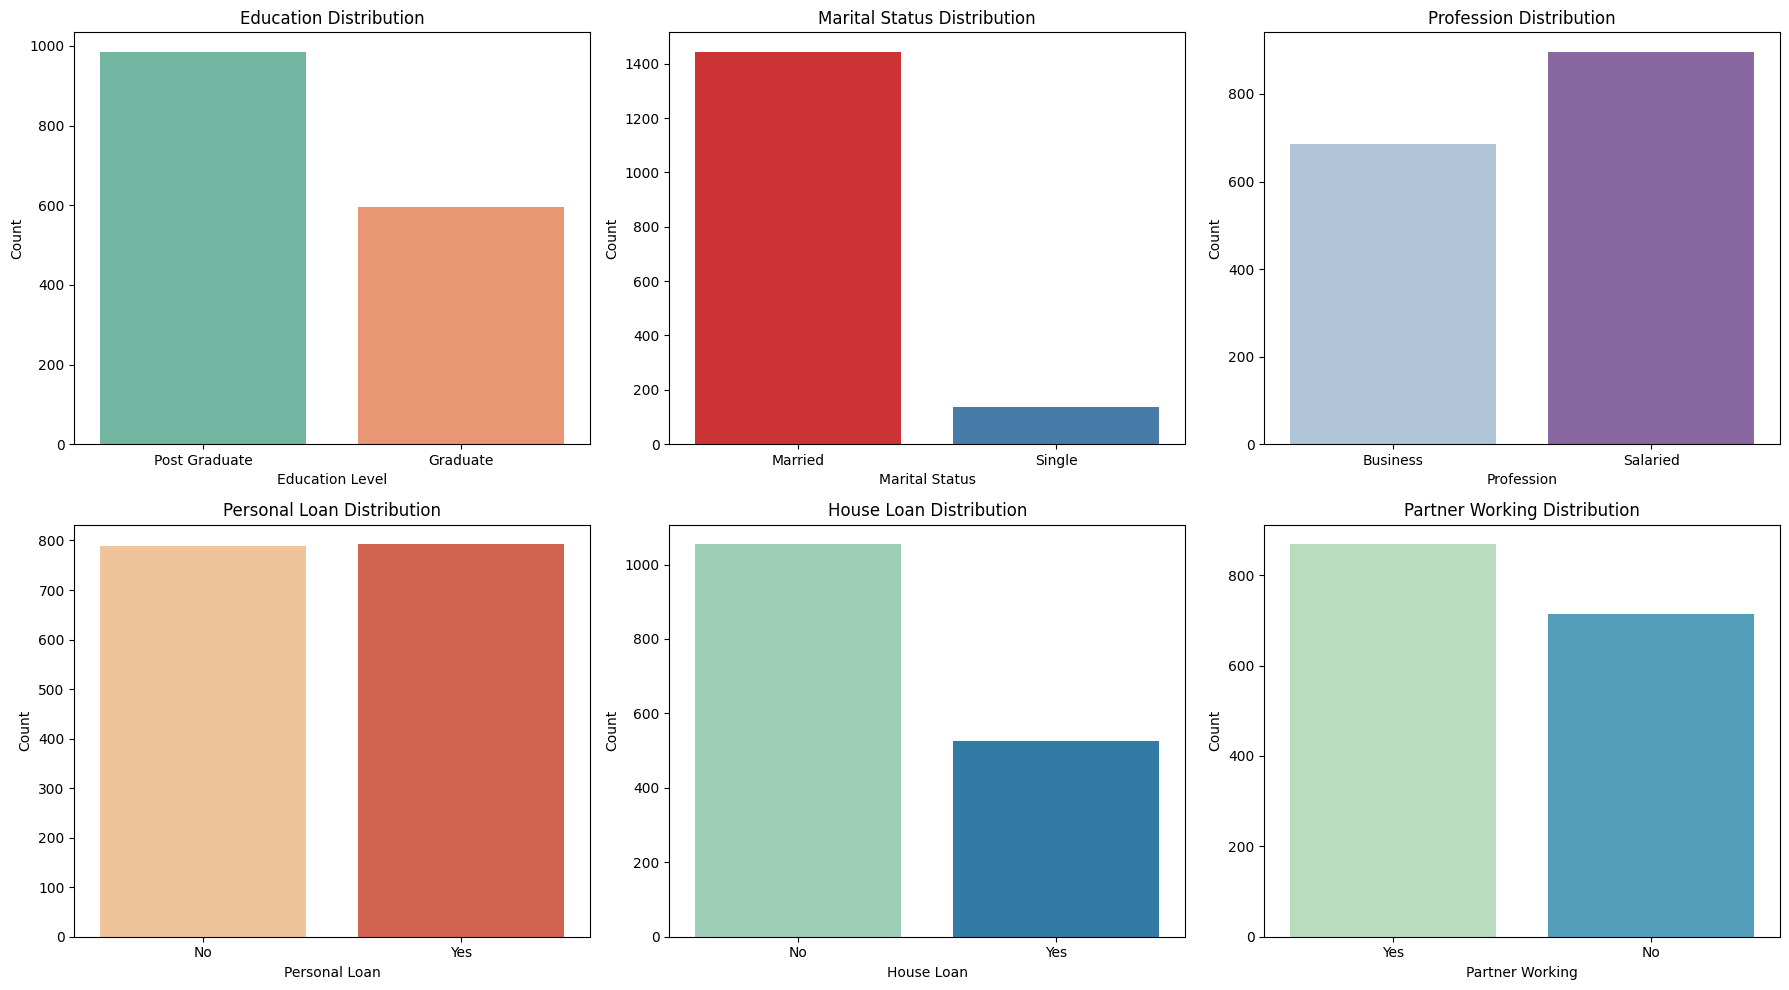

In [ ]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18,10))

# Plotting 'Education' distribution
sns.countplot(data=df, x='Education', palette='Set2', ax=axes[0,0])
axes[0,0].set_title('Education Distribution')
axes[0,0].set_xlabel('Education Level')
axes[0,0].set_ylabel('Count');
# Plotting 'Marital Status' distribution
sns.countplot(data=df, x='Marital_status', palette='Set1', ax=axes[0,1])
axes[0,1].set_title('Marital Status Distribution')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Count');
# Plotting 'Profession' distribution
sns.countplot(data=df, x='Profession', palette='BuPu', ax=axes[0,2])
axes[0,2].set_title('Profession Distribution')
axes[0,2].set_xlabel('Profession')
axes[0,2].set_ylabel('Count');
# Plotting 'Personal_loan' distribution
sns.countplot(data=df, x='Personal_loan', palette='OrRd', ax=axes[1,0])
axes[1,0].set_title('Personal Loan Distribution')
axes[1,0].set_xlabel('Personal Loan')
axes[1,0].set_ylabel('Count')
# Plotting 'House_loan' distribution
sns.countplot(data=df, x='House_loan', palette='YlGnBu', ax=axes[1,1])
axes[1,1].set_title('House Loan Distribution')
axes[1,1].set_xlabel('House Loan')
axes[1,1].set_ylabel('Count')

# Plotting 'Partner_working' distribution
sns.countplot(data=df, x='Partner_working', palette='GnBu', ax=axes[1,2])
axes[1,2].set_title('Partner Working Distribution')
axes[1,2].set_xlabel('Partner Working')
axes[1,2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


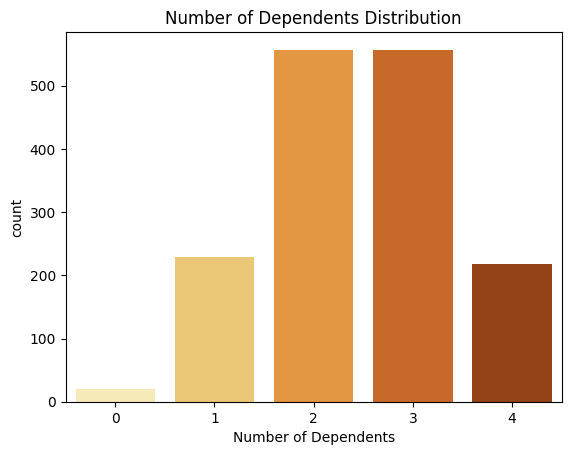

In [ ]:
sns.countplot(data=df, x='No_of_Dependents', palette='YlOrBr')
plt.title('Number of Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.show()

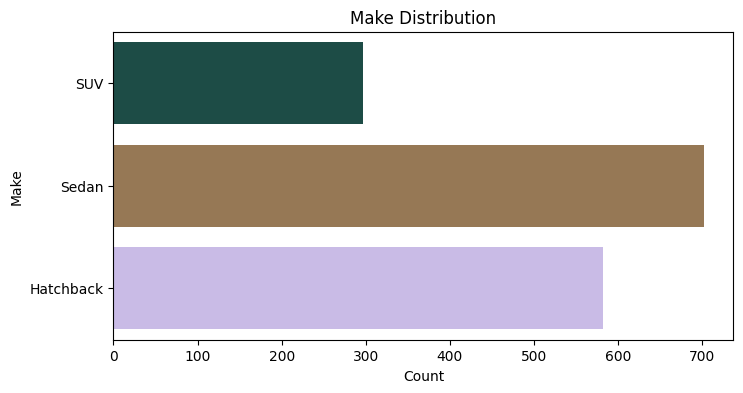

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Make', palette='cubehelix')
plt.title('Make Distribution')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

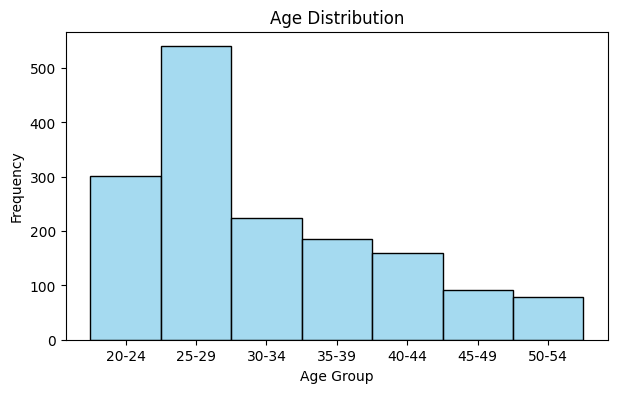

In [ ]:
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='Age_Group', kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency');

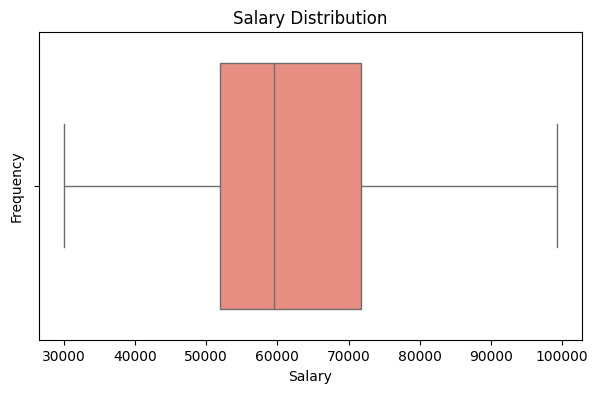

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Salary', color='Salmon')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency');

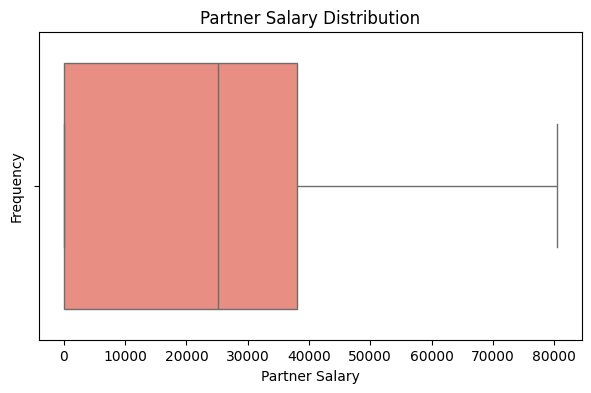

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Partner_salary', color='Salmon')
plt.title('Partner Salary Distribution')
plt.xlabel('Partner Salary')
plt.ylabel('Frequency');

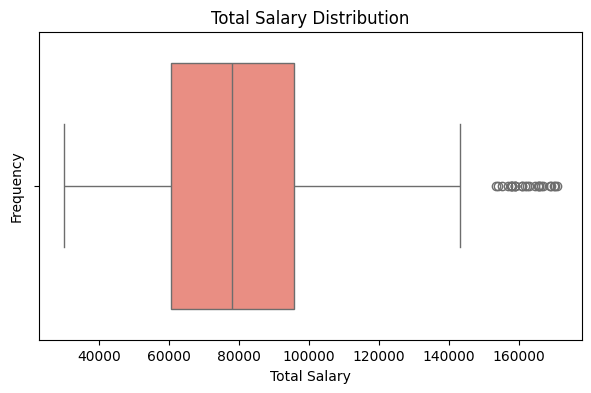

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Total_salary', color='Salmon')
plt.title('Total Salary Distribution')
plt.xlabel('Total Salary')
plt.ylabel('Frequency');

There are outliers in the Total Salary Distribution. But these entries are not incorrect or wrong entries, we can retain them in the data for accurate analysis.

# BIVARIATE ANALYSIS

### **Relationship Between All Numerical Variables**

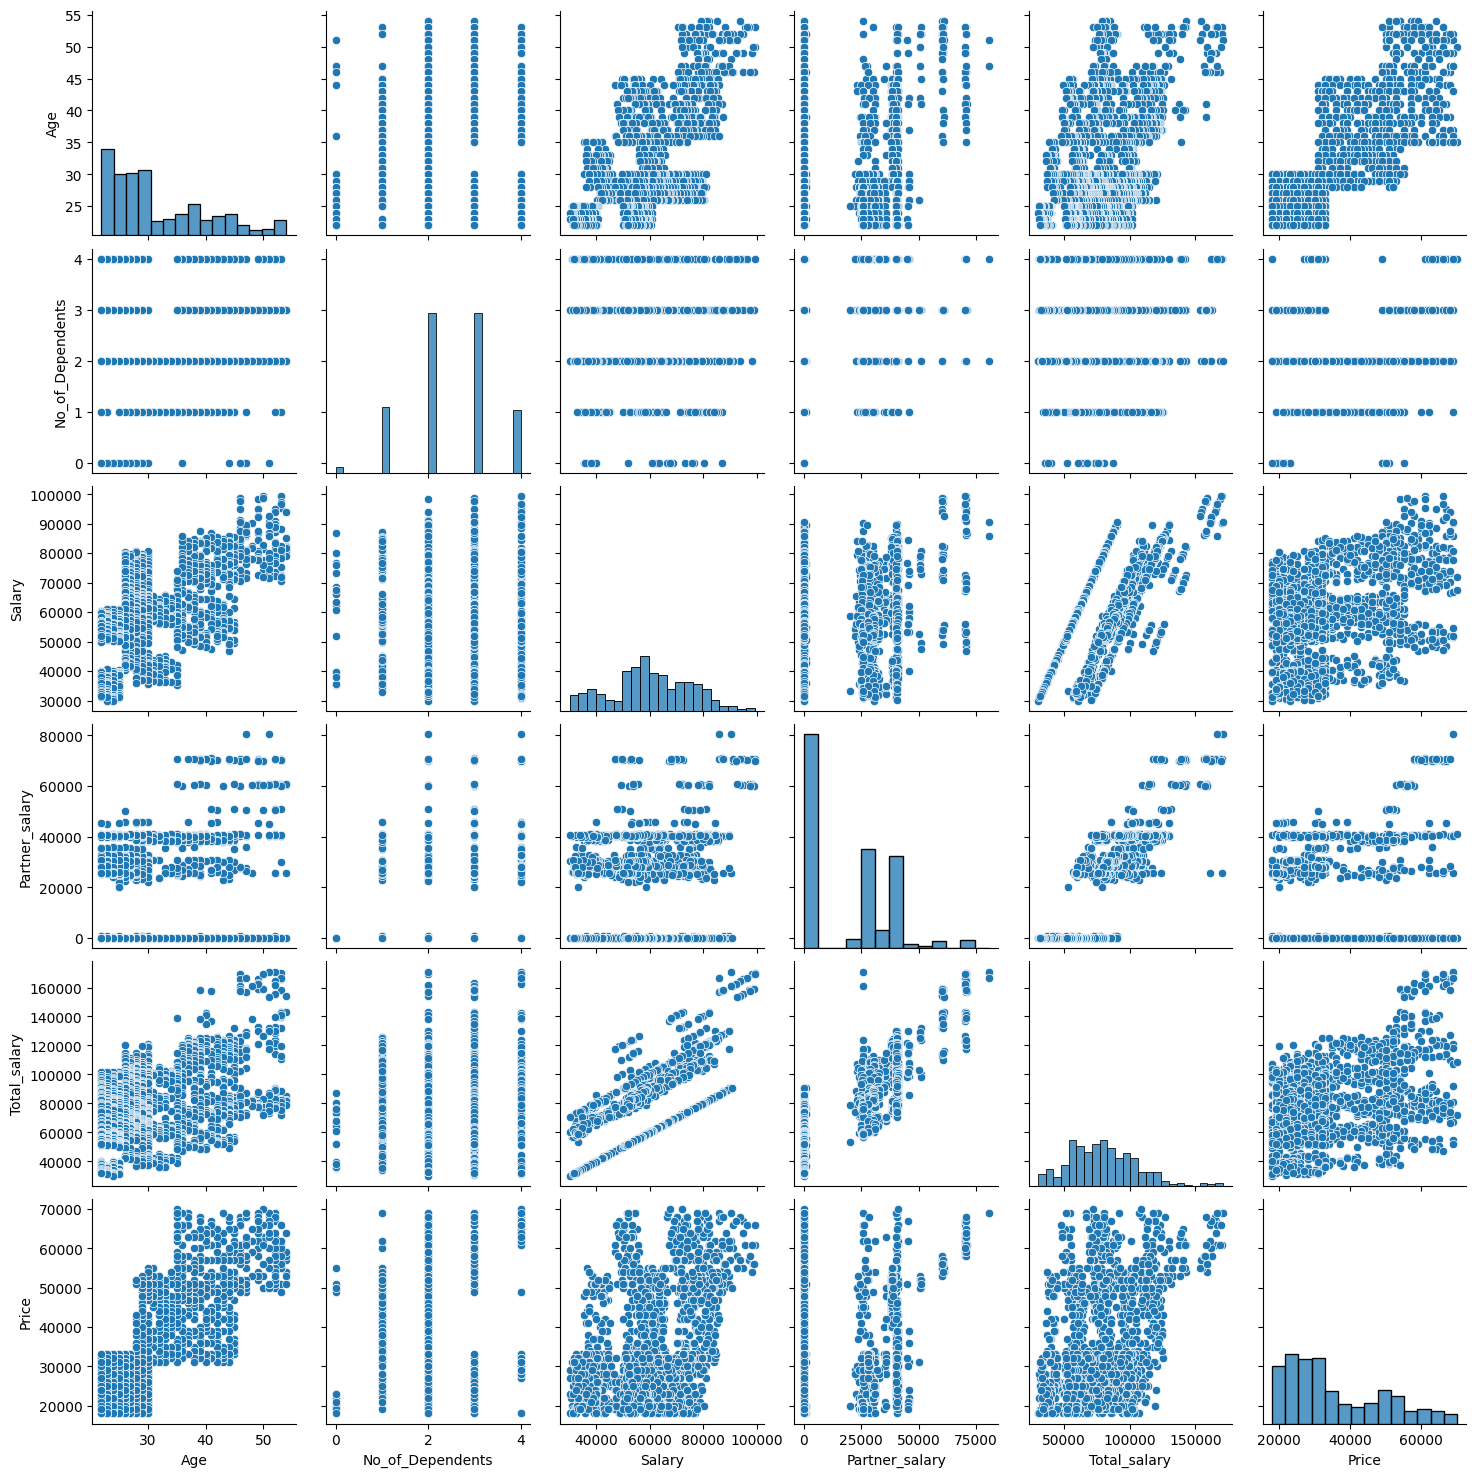

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a pair plot
sns.pairplot(df[numerical_cols])
plt.show()

**Distributions:**
1. Age: The distribution appears to be slightly right-skewed, meaning there are more younger buyers and fewer older ones. There's a subtle peak around the 30-40 age range.
2. No_of_Dependents: Heavily skewed to the right. The vast majority of buyers have 2-3 dependents.
3. Salary, Partner_salary, Total_salary: All right-skewed. Most individuals and households have lower incomes, with a long tail stretching towards higher earners.
4. Price: Also right-skewed, with most car purchases concentrated in the lower-to-mid price range.

**Relationships:**
1. Age vs. Price: A clear positive correlation. The upward trend in the scatter plot is evident, confirming that older buyers tend to purchase more expensive cars.
2. Salary/Partner_salary/Total_salary vs. Price: Strong positive correlations, as expected. Higher income is associated with more expensive car purchases. The relationship seems particularly strong for Total_salary.
3. Age vs. Salary: A moderate positive correlation. Older individuals generally have higher salaries, but there's more variability here than in Age vs. Price.
4. No_of_Dependents vs. others: Still very weak correlations. The number of dependents doesn't seem to be a major driver of car purchase decisions based on this plot.
Outliers:

5. Age vs. Price: A couple of very young buyers purchasing expensive cars.
Income vs. Price: A few individuals with relatively low salaries buying high-priced cars.

Age and income are key factors in car purchases. The number of dependents appears less influential

### **Correlation Between All Numerical Variables**

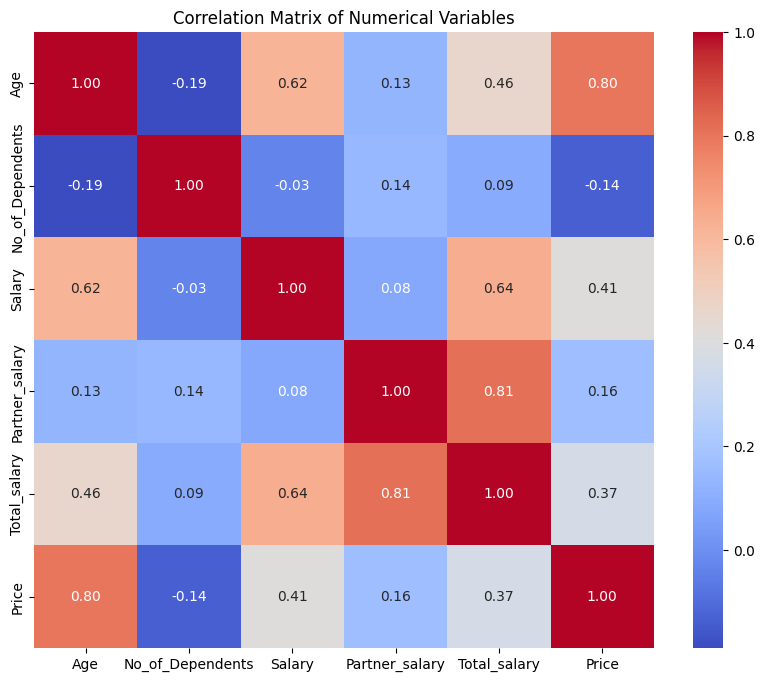

In [ ]:
correlation_matrix = df[numerical_cols].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show();

**Strongest Relationships:**

Age & Price (0.80): This is a very strong positive correlation, confirming what we saw in the scatter plots. Older buyers purchase more expensive cars. This reflects increased purchasing power with age, perhaps due to career progression and accumulated wealth.
Salary & Total_salary (0.64), Partner_salary & Total_salary (0.81): These strong correlations are expected since Total_salary is the combined income of the buyer and their partner.

**Moderate Relationships:**

Age & Salary (0.62): Older individuals generally have higher salaries due to career progressions etc.
Salary & Price (0.41): Higher individual salaries are linked to buying more expensive cars, but the correlation is not as strong as with Total_salary, suggesting that partner income also plays a role.

**Weak Relationships:**

No_of_Dependents: As we've seen before, the number of dependents has weak correlations with all other factors. This suggests it's not a primary driver of car purchase decisions in this dataset. However, it's important to remember that this doesn't mean families aren't important customers! It just means the number of dependants might not directly dictate the price of the car they buy.

**Interesting Points:**

Age & No_of_Dependents (-0.19): This slight negative correlation suggests that older buyers tend to have fewer dependents, which is a general demographic trend.
Total_salary & Price (0.37): While this correlation is positive, it's not as strong as one might expect. This could indicate that factors beyond just total income are influencing car purchase decisions, such as personal preferences, brand loyalty, or specific needs.

**Actionable Insights for the Car Manufacturer:**

Target Demographics: Focus marketing efforts on older, higher-income individuals for luxury or higher-priced models.
Financial Products: Offer tailored financing options or promote joint ownership schemes, given the strong influence of both individual and partner salaries.
Family-Oriented Vehicles: While the number of dependents isn't strongly correlated with price, the company should still consider the needs of families when designing and marketing specific models.


### Relationship Between Categorical vs Numerical Variables

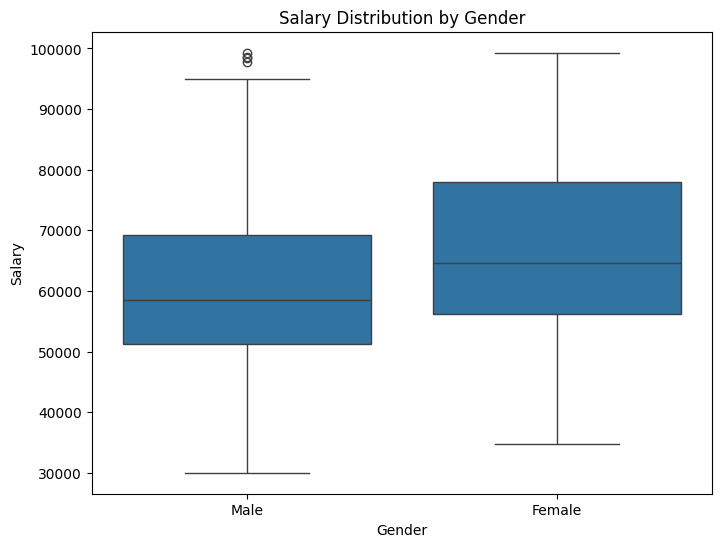

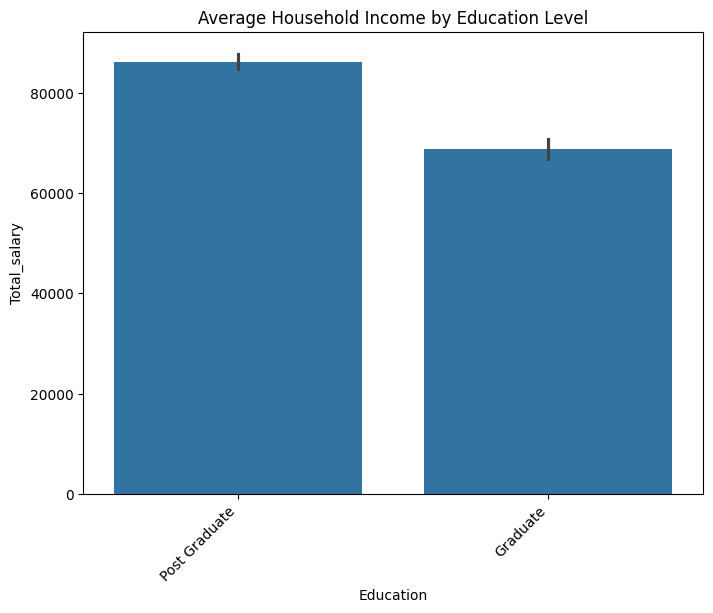

In [ ]:
# Example: Relationship between 'Gender' (categorical) and 'Salary' (numerical)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

# Example: Relationship between 'Education' (categorical) and 'Household_income' (numerical)
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Total_salary', data=df)
plt.title('Average Household Income by Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()

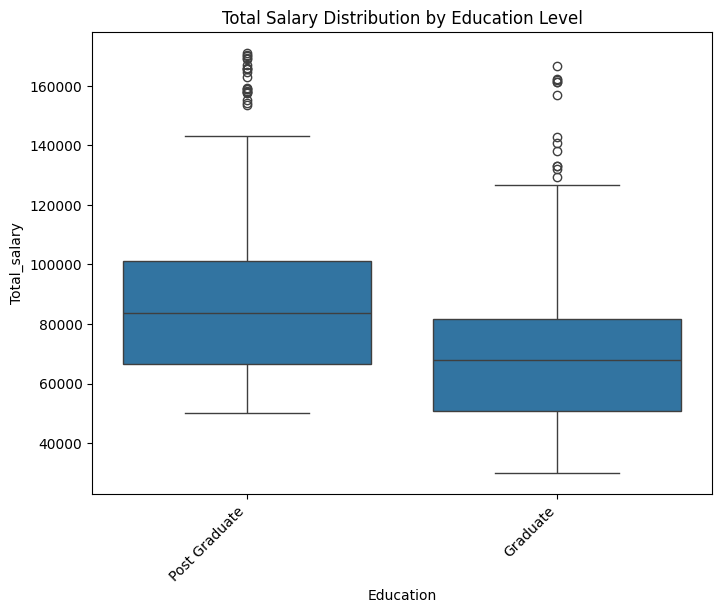

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Total_salary', data=df)
plt.title('Total Salary Distribution by Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()

* **PostGraduates are earning higher salary ranges compared to Gradutes but not
significantly high. There are outliers in both the cases.**

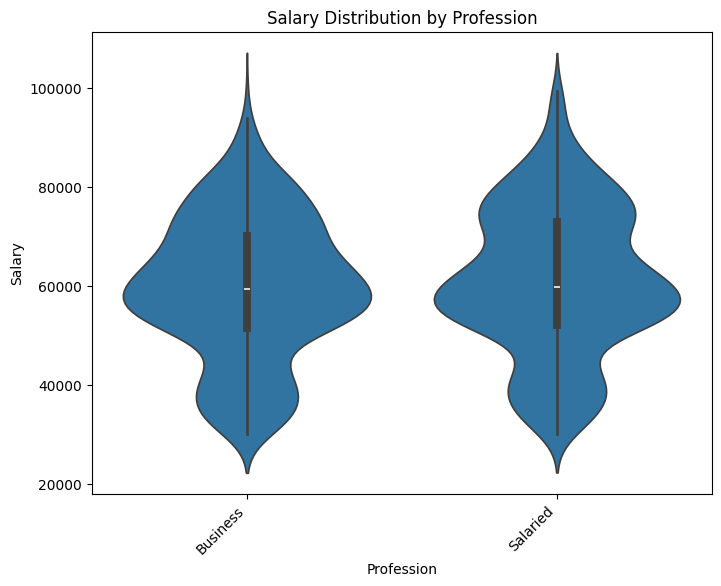

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Profession', y='Salary', data=df)
plt.title('Salary Distribution by Profession')
plt.xticks(rotation=45, ha='right')
plt.show()

1. **Similar Salary Ranges:** Both business owners and salaried folks in our data earn roughly the same range of salaries, with most clustered in the middle.
2. **Salaried Earn Slightly More:** Salaried individuals seem to have a slight edge in earning potential, with their median salary a bit higher than business owners.
3. **More High Earners in Salaried Jobs:** We see more salaried individuals at the higher end of the salary spectrum.
4. **For Car Sales:** This means both groups are important, but salaried buyers might be more likely to afford those pricier models or upgrades. We shouldn't count out business owners, though!

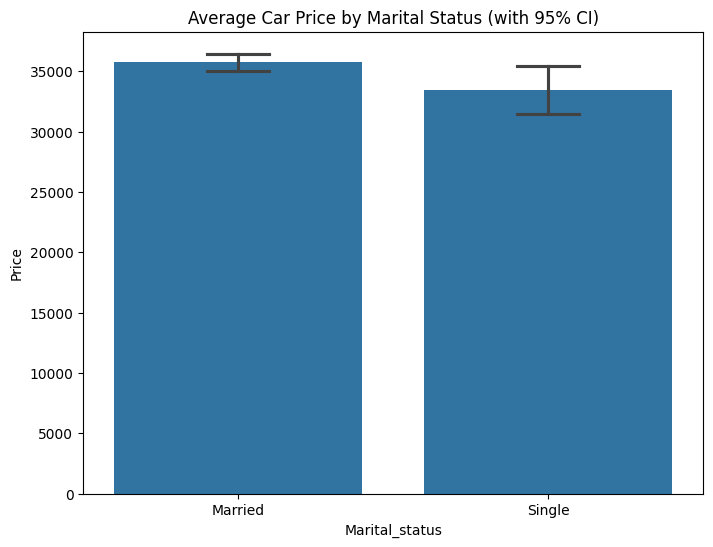

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_status', y='Price', data=df, ci=95, capsize=0.2)
plt.title('Average Car Price by Marital Status (with 95% CI)')
plt.show()

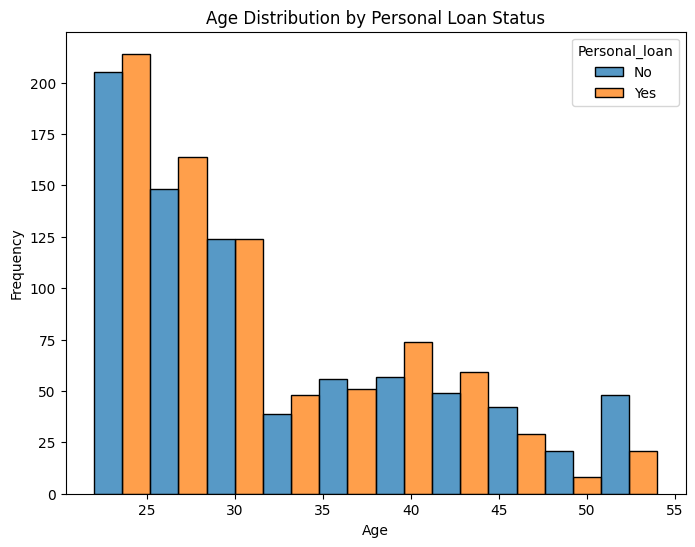

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Personal_loan', multiple='dodge', bins=10)
plt.title('Age Distribution by Personal Loan Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

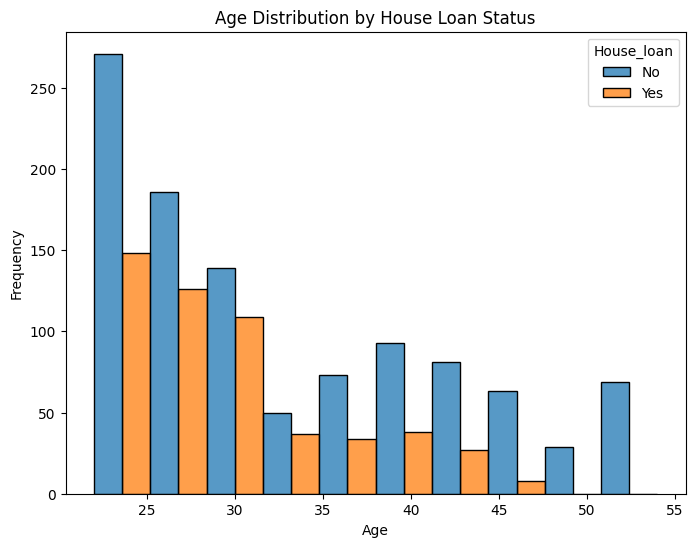

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='House_loan', multiple='dodge', bins=10)
plt.title('Age Distribution by House Loan Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* **There are more people between the ages of 20 to 30 with more personal loans compared to the customers at higher age groups. Debt/Loan liabilties will help in strategising the marketing campaign.**

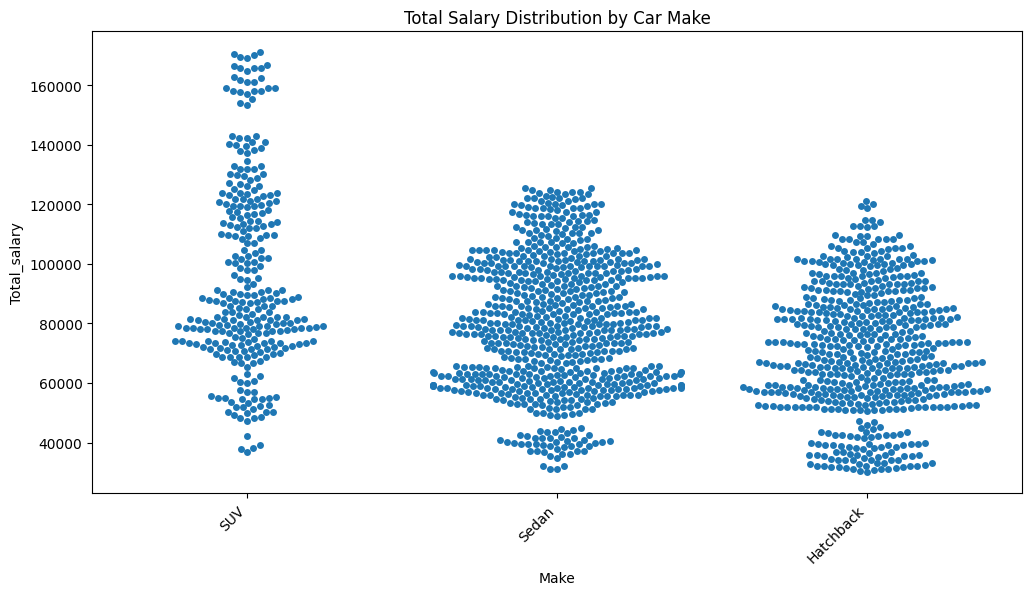

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Make', y='Total_salary', data=df)
plt.title('Total Salary Distribution by Car Make')
plt.xticks(rotation=45, ha='right')
plt.show()

1. SUVs are popular across all income levels: They're a consistent choice whether buyers have high or low total salaries.
2. Sedans attract a wider income range: While popular with those who have mid-range salaries, we also see some high earners opting for sedans.
3. Hatchbacks are favored by those with lower incomes: They seem to be the most budget-friendly option, but some with higher incomes are buying them too.

   Gender  SUV_Preference_Percentage
0  Female                  52.583587
1    Male                   9.904153


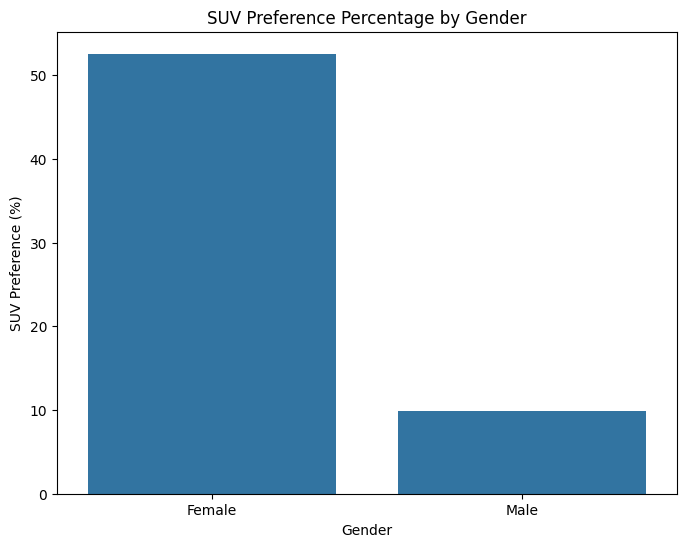

In [ ]:
# Grouping data by gender and calculating the percentage of SUV purchases
suv_preference_by_gender = df.groupby('Gender')['Make'].apply(lambda x: (x == 'SUV').mean() * 100).reset_index(name='SUV_Preference_Percentage')

# Printing the results
print(suv_preference_by_gender)

# Visualising the results using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='SUV_Preference_Percentage', data=suv_preference_by_gender)
plt.title('SUV Preference Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('SUV Preference (%)')
plt.show()

⭐ **More than 50% of the Females prefer SUV compared to Males who have only around 10% preference.**

In [ ]:
# Calculating the total number of Salaried people
total_salaried = len(df[df['Profession'] == 'Salaried'])

# Calculating the number of Salaried people who bought a Sedan
salaried_sedan = len(df[(df['Profession'] == 'Salaried') & (df['Make'] == 'Sedan')])

# Calculating the likelihood (probability)
likelihood = salaried_sedan / total_salaried * 100  # Multiply by 100 to get percentage

# Printing the result
print(f"The likelihood of a salaried person buying a Sedan is: {likelihood:.2f}%")

The likelihood of a salaried person buying a Sedan is: 44.20%


⭐ **The likelihood of a Salaried Person buying a Sedan is 44.20%**

SUV Buying Rate for Male Salaried Individuals: 13.39%
Sedan Buying Rate for Male Salaried Individuals: 45.39%
Hatchback Buying Rate for Male Salaried Individuals: 41.22%


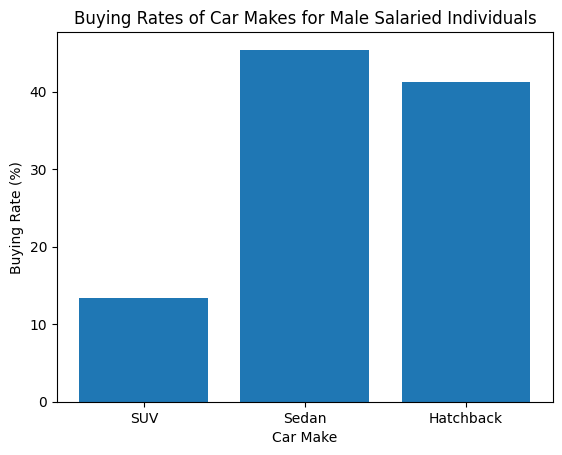

In [ ]:
# Filter for male salaried individuals
male_salaried_df = df[(df['Profession'] == 'Salaried') & (df['Gender'] == 'Male')]

# Total number of male salaried individuals
total_male_salaried = len(male_salaried_df)

# Number of male salaried individuals who bought an SUV
male_salaried_suv = len(male_salaried_df[male_salaried_df['Make'] == 'SUV'])

# Number of male salaried individuals who bought a Sedan
male_salaried_sedan = len(male_salaried_df[male_salaried_df['Make'] == 'Sedan'])

# Number of male salaried individuals who bought a Hatchback
male_salaried_hatchback = len(male_salaried_df[male_salaried_df['Make'] == 'Hatchback'])

# SUV buying rate
suv_buying_rate = (male_salaried_suv / total_male_salaried) * 100 if total_male_salaried > 0 else 0

# Sedan buying rate
sedan_buying_rate = (male_salaried_sedan / total_male_salaried) * 100 if total_male_salaried > 0 else 0

# Hatchback buying rate
hatchback_buying_rate = (male_salaried_hatchback / total_male_salaried) * 100 if total_male_salaried > 0 else 0

print(f"SUV Buying Rate for Male Salaried Individuals: {suv_buying_rate:.2f}%")
print(f"Sedan Buying Rate for Male Salaried Individuals: {sedan_buying_rate:.2f}%")
print(f"Hatchback Buying Rate for Male Salaried Individuals: {hatchback_buying_rate:.2f}%")


# Create a bar plot to visualize the buying rates
buying_rates = {'SUV': suv_buying_rate, 'Sedan': sedan_buying_rate, 'Hatchback': hatchback_buying_rate}
plt.bar(buying_rates.keys(), buying_rates.values())
plt.xlabel('Car Make')
plt.ylabel('Buying Rate (%)')
plt.title('Buying Rates of Car Makes for Male Salaried Individuals')
plt.show()


⭐ **There is no direct evidence to support Sheldon Copper's claim that a salaried male is an easier target for a SUV over a Sedan sale! infact, it is the contrary.**

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64


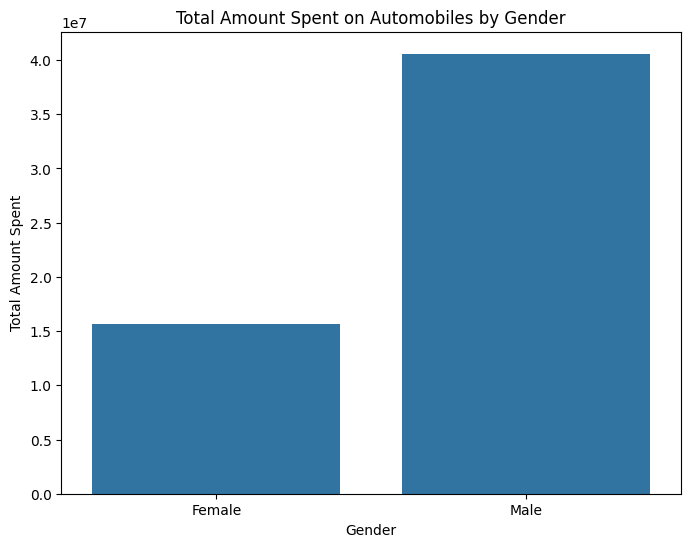

In [ ]:
# Group the data by gender and calculate the total amount spent on automobiles for each gender
auto_purchase_by_gender = df.groupby('Gender')['Price'].sum()
print(auto_purchase_by_gender)

# Visualize the results using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=auto_purchase_by_gender.index, y=auto_purchase_by_gender.values)
plt.title('Total Amount Spent on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.show()

⭐ **Overall, the amount of money spent by Male category is much higher than the Female category, it is almost 3 times high.**

In [ ]:
personal_loan_df = df[df['Personal_loan'] == 'Yes'] #checking if personal loan exists

# Calculate the total amount spent on automobiles by these individuals
total_spent = personal_loan_df['Price'].sum()
print(f"Total amount spent on automobiles by these individuals: ${total_spent:.2f}")

Total amount spent on automobiles by these individuals: $27290000.00


⭐ **Total amount spent on automobiles by these individuals: $27290000.00**

Price threshold for higher-priced cars: 47000.0


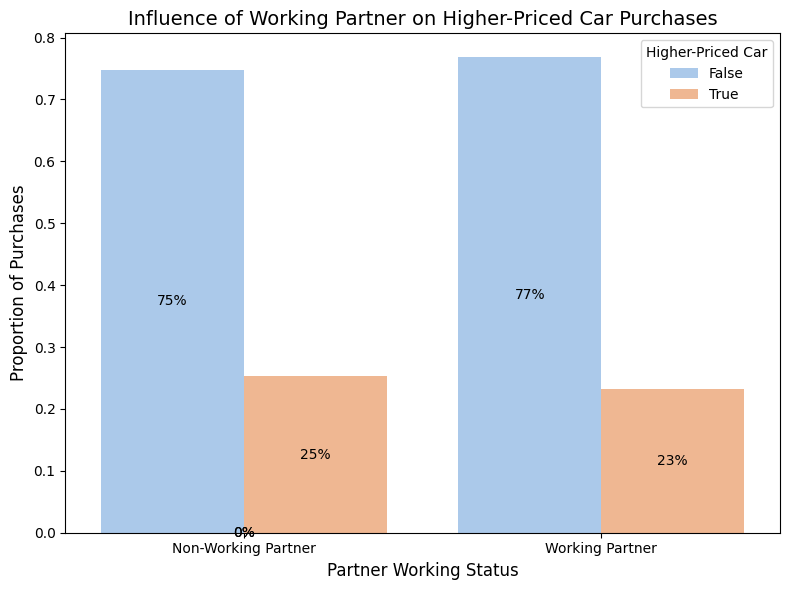

In [ ]:
# The price threshold (75th percentile) is calculated to define "higher-priced" cars.
price_threshold = df['Price'].quantile(0.75)
print(f"Price threshold for higher-priced cars: {price_threshold}")

# A new column is created to easily identify higher-priced cars.
df['Higher_Priced'] = df['Price'] > price_threshold

# A column is added to categorize customers based on partner's working status.
df['Partner_Working_Status'] = df['Partner_working'].map({'Yes': 'Working Partner', 'No': 'Non-Working Partner'})

# The data is grouped to observe purchase patterns between customer segments.
grouped_data = df.groupby(['Partner_Working_Status', 'Higher_Priced'])['Price'].count().reset_index()
# Proportions are calculated within each group to understand purchase likelihood.
grouped_data['Proportion'] = grouped_data.groupby('Partner_Working_Status')['Price'].transform(lambda x: x / x.sum())

# A grouped bar chart is created to visualize the findings.
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Partner_Working_Status', y='Proportion', hue='Higher_Priced', data=grouped_data, palette='pastel')
plt.title('Influence of Working Partner on Higher-Priced Car Purchases', fontsize=14)
plt.xlabel('Partner Working Status', fontsize=12)
plt.ylabel('Proportion of Purchases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Percentage labels are added for clarity and easier interpretation.
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.0%}', ha='center', va='center', fontsize=10, color='black')

plt.legend(title='Higher-Priced Car', fontsize=10)
plt.tight_layout()
plt.show()

**There is no impact or influence on the Partner Working status on the purchase of High-priced cars like SUVs (in this case i have considered above the 75th percentile)**